<a href="https://colab.research.google.com/github/tiachoi2001/ToBigs20/blob/main/Week5_Ensemble_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


전처리

In [3]:
data = pd.read_csv("/content/drive/MyDrive/ToBigs_session/Week5/archive/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.shape

(10127, 23)

In [5]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
data["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"].head()

0    0.000093
1    0.000057
2    0.000021
3    0.000134
4    0.000022
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, dtype: float64

In [8]:
data["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"].head()

0    0.99991
1    0.99994
2    0.99998
3    0.99987
4    0.99998
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, dtype: float64

In [9]:
data_1 = data.drop(columns=["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"])

In [10]:
data_1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
data_1.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [12]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

필요 시 변환해야할 변수 -> Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category

target -> Attrition_Flag

In [13]:
data_2 = data_1.copy()

In [14]:
data_2['Attrition_Flag'] = data_2['Attrition_Flag'].map({'Attrited Customer':0, 'Existing Customer':1})

In [15]:
data_2['Gender'] = data_2['Gender'].map({'M':1, 'F':2})

In [16]:
data_2.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [17]:
map1 = {'Unknown':-1,'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5}

In [18]:
data_2['Education_Level'] = data_2['Education_Level'].map(map1)

In [19]:
data_2.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [20]:
map2 = {'Unknown':-1,'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4}

In [21]:
data_2['Income_Category'] = data_2['Income_Category'].map(map2)

In [22]:
data_2.Marital_Status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [23]:
map3 = {'Unknown':-1,'Single':0, 'Divorced':1, 'Married':2}

In [24]:
data_2['Marital_Status'] = data_2['Marital_Status'].map(map3)

In [25]:
data_2.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [26]:
map4 = {'Blue':0,'Gold':1, 'Silver':2, 'Platinum':3}

In [27]:
data_2['Card_Category'] = data_2['Card_Category'].map(map4)

In [28]:
data_2.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,1,50,1,2,3,0,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,-1,1,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,2,1,1,2,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,3,-1,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,0,43,2,2,3,2,0,2,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [29]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [30]:
data_2.max().to_frame().T

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,73.0,2.0,5.0,5.0,2.0,4.0,3.0,56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,3.397,18484.0,139.0,3.714,0.999


In [31]:
data_2.min().to_frame().T

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,26.0,1.0,0.0,-1.0,-1.0,-1.0,0.0,13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,10.0,0.0,0.0


정규화

In [32]:
data_2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [33]:
# from sklearn.preprocessing import MinMaxScaler

# data_3 = data_2.copy()

# scaler = MinMaxScaler()
# scale_columns = data_3.columns[]
# data_3[scale_columns] = scaler.fit_transform(data_3[scale_columns])

In [34]:
data_2.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,1,2,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,2,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,3,2,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,2,4,1,-1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,0,2,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [35]:
X = data_2.drop('Attrition_Flag', axis = 1)
y = data_2['Attrition_Flag']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2021, stratify = y)

In [37]:
# from sklearn.feature_selection import f_regression, SelectKBest
# ## selctor 정의하기.
# selector = SelectKBest(score_func=f_regression, k=10)
# ## 학습데이터에 fit_transform
# X_train_selected = selector.fit_transform(X_train, y_train)
# ## 테스트 데이터는 transform
# X_test_selected = selector.transform(X_test)
# X_train_selected.shape, X_test_selected.shape

#고르지 않는것이 더 좋은 결과를 나타냄

In [38]:
# all_names = X_train.columns
# ## selector.get_support()
# selected_mask = selector.get_support()
# ## 선택된 특성(변수)들
# selected_names = all_names[selected_mask]
# ## 선택되지 않은 특성(변수)들
# unselected_names = all_names[~selected_mask]
# print('Selected names: ', selected_names)
# print('Unselected names: ', unselected_names)

1. XGBoost

In [39]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as nd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [40]:
dt=load_breast_cancer()
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [41]:
params = {'max_depth':3,
         'eta':0.1,
         'objective':'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100}

num_rounds=400

In [42]:
w_list = [(dtrain,'train'),(dtest,'test')]
xgb_ml = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,\
                  early_stopping_rounds=100, evals=w_list)

[06:27:56] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.62305	test-logloss:0.62312
[1]	train-logloss:0.56564	test-logloss:0.56565
[2]	train-logloss:0.51759	test-logloss:0.51850
[3]	train-logloss:0.47922	test-logloss:0.48027
[4]	train-logloss:0.44703	test-logloss:0.44839
[5]	train-logloss:0.41476	test-logloss:0.41666
[6]	train-logloss:0.38705	test-logloss:0.38940
[7]	train-logloss:0.36567	test-logloss:0.36804
[8]	train-logloss:0.34388	test-logloss:0.34615
[9]	train-logloss:0.32480	test-logloss:0.32695
[10]	train-logloss:0.30803	test-logloss:0.31039
[11]	train-logloss:0.29200	test-logloss:0.29495
[12]	train-logloss:0.27992	test-logloss:0.28351
[13]	train-logloss:0.26682	test-logloss:0.27110
[14]	train-logloss:0.25562	test-logloss:0.25999
[15]	train-logloss:0.24590	test-logloss:0.25037
[16]	train-logloss:0.23718	test-logloss:0.24133
[17]	train-logloss:0.22926	test-logloss:0.23343
[18]	train-logloss:0.22265	test-logloss:0.22757
[19]	

In [43]:
pred_probs = xgb_ml.predict(dtest)
pred=[1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개:',pred[:100])

예측값 10개: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [44]:
from sklearn.metrics import *

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
confusion_matrix(y_test, pred)

array([[ 293,   32],
       [  27, 1674]])

In [45]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.9708785784797631


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

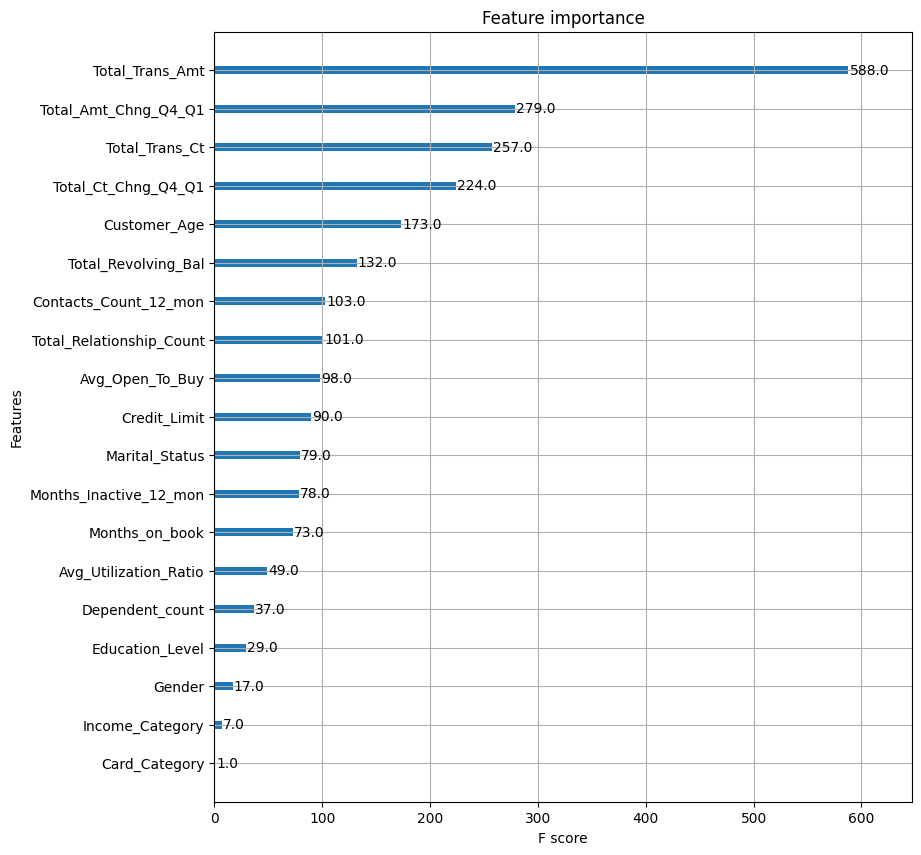

In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,10))
plot_importance(xgb_ml, ax=ax)

2. 랜덤 포레스트

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

RF_model = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
RF_model.fit(X_train, y_train)

predict1 = RF_model.predict(X_test)
print(accuracy_score(y_test, predict1))

0.9170779861796644


In [48]:
RF_model_2 = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0)
RF_model_2.fit(X_train, y_train)

predict2 = RF_model_2.predict(X_test)
print(accuracy_score(y_test,predict2))

0.9595261599210266


In [49]:
RF_model_3 = RandomForestClassifier(n_estimators=100, max_depth=100,random_state=0)
RF_model_3.fit(X_train, y_train)

predict3 = RF_model_3.predict(X_test)
print(accuracy_score(y_test,predict3))

0.9624876604146101


3. AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
Ada_model.fit(X_train, y_train)
pred = Ada_model.predict(X_test)
print(accuracy_score(y_test, pred))

0.9590325765054294


In [51]:
Ada_model_2 = AdaBoostClassifier(n_estimators=300, random_state=42)
Ada_model_2.fit(X_train, y_train)
pred_2 = Ada_model_2.predict(X_test)
print(accuracy_score(y_test, pred_2))

0.9624876604146101


In [52]:
tree_model = DecisionTreeClassifier(max_depth = 5)
Ada_model_3 = AdaBoostClassifier(base_estimator = tree_model, n_estimators=300, random_state=42)
Ada_model_3.fit(X_train, y_train)
pred_3 = Ada_model_3.predict(X_test)
print(accuracy_score(y_test, pred_3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9664363277393879


In [53]:
tree_model_2 = DecisionTreeClassifier(max_depth = 100)
Ada_model_4 = AdaBoostClassifier(base_estimator = tree_model_2, n_estimators=300, random_state=42)
Ada_model_4.fit(X_train, y_train)
pred_4 = Ada_model_4.predict(X_test)
print(accuracy_score(y_test, pred_4))

0.9387956564659428


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
